# **Деревья решений**

✍ В этом юните мы познакомимся с ещё одним семейством моделей машинного обучения — деревьями решений. Для начала поговорим о том, что такое дерево решений и как с его помощью решают задачу классификации.

Деревья решений являются одним из наиболее понятных человеку и в то же время мощных алгоритмов принятия решений. К тому же на их основе строятся самые эффективные ансамблевые модели машинного обучения, такие как случайный лес, о котором мы поговорим далее.

Алгоритмы на основе деревьев решений могут использоваться как для решения задач классификации, так и для регрессии. В этом модуле мы разберём задачу классификации, а в дальнейшем, когда будем разбирать математическую составляющую алгоритмов, поговорим о том, как научить дерево решать задачу регрессии.

*Если коротко, решающее дерево предсказывает значение целевой переменной с помощью применения последовательности простых решающих правил. Этот процесс в некотором смысле согласуется с естественным для человека процессом принятия решений.*

***
## **ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ДЕРЕВЕ РЕШЕНИЙ**

Начнём сразу с примера.

Представьте, что у вас есть автомобиль, который вы решили застраховать. Вы приходите в страховую компанию, где вам дают заполнить анкету. По этой анкете сотрудник страховой компании будет принимать решение, стоит ли выдавать вам страховку.

Сотрудник в свою очередь будет руководствоваться примерно следующим регламентом:

![](https://lms.skillfactory.ru/assets/courseware/v1/55d9867a82d4590548115759959c2105/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-5_1.png)

То есть сотрудник при принятии решения использует информацию, предоставленную вами в анкете, и подает её на вход вложенного условного оператора.

Аналогичным образом работает и алгоритм машинного обучения под названием **«дерево решений» (Decision Tree)**. 

Если дерево уже обучено, то есть уже сформулированы условия в прямоугольниках, то, когда в страховую компанию придёт новый автовладелец, сотруднику будет достаточно прогнать данные клиента через дерево решений и таким образом принять решение, то есть произвести классификацию.

*Вот ещё один пример дерева решений. Большинство из нас когда-нибудь играли в игру «Слова на лбу» или «Тарантинки». На лоб каждого из игроков приклеивается бумажка с написанным на ней словом. Игрок может задавать другим игрокам вопросы о загаданном ему предмете/животном/человеке и т. д. Другие игроки могут отвечать на вопросы только «Да» и «Нет». Цель — за минимальное количество вопросов догадаться, о чём идёт речь.*

Логика «если …, то …» используется людьми повседневно и поэтому интуитивно понятна каждому из нас. На основании этих рассуждений можно построить мощный алгоритм машинного обучения.

Деревья решений находят своё применение во множестве прикладных задач.

Успешнее всего деревья применяют в следующих областях:

* Банковское дело. Оценка кредитоспособности клиентов банка при выдаче кредитов.
* Промышленность. Контроль качества продукции (обнаружение дефектов в готовых товарах), испытания без нарушений (например, проверка качества сварки) и т. п.
* Медицина. Диагностика заболеваний разной сложности.
* Молекулярная биология. Анализ строения аминокислот.
* Торговля. Классификация клиентов и товара.
***

Теперь перейдём к формальной части. Нам важно уже сейчас познакомиться с терминологией деревьев решений, чтобы понять общий принцип их обучения.

Пусть у нас есть всё та же матрица наблюдений X, в которой содержатся наблюдения и характеризующие их признаки (привычный нам DataFrame), и правильные ответы y — метки классов. 

Дадим определение дереву решений и его составляющим ↓

Формально структура дерева решений — это **связный ациклический граф**. Что это значит?

* **Граф** — это абстрактная топологическая модель, которая состоит из вершин и соединяющих их рёбер.
* **Связный граф** — это граф, в котором между любой парой существует направленная связь.
* **Ациклический граф** — это граф, в котором отсутствуют циклы, то есть в графе не существует такого пути, по которому можно вернуться в начальную вершину.

![](https://lms.skillfactory.ru/assets/courseware/v1/d6d878b27abd1111166a4e31f3ab85a1/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-5_2.png)

Примечание. Рекомендуем вам запомнить данное лаконичное определение дерева — так вы сможете показать свой уровень знаний перед будущим работодателем.

В дереве решений можно выделить **три типа вершин:**

![](https://lms.skillfactory.ru/assets/courseware/v1/21107d31142a0bc75a8a6f2aed449775/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-5_3.png)

* **Корневая вершина (root node)** — то, откуда всё начинается. Это первый и самый главный вопрос, который дерево задаёт объекту. В примере со страхованием это был вопрос «Возраст автовладельца > 40».
* **Внутренние вершины (intermediate nodes)** — это дополнительные уточняющие вопросы, которые дерево задаёт объекту. 
* **Листья (leafs)** — конечные вершины дерева. Это вершины, в которых содержится конечный «ответ» — класс объекта.

***Максимально возможная длина от корня до самых дальних листьев (не включая корневую) называется максимальной глубиной дерева (max depth).***

Во внутренней или корневой вершине признак проверяется на некий логический критерий, по результатам которого мы движемся всё глубже по дереву. Например, «Количество кредитов <= 1». 

Логический критерий, который находится в каждой вершине, называется **предикатом**, или **решающим правилом**.

На самом деле все предикаты — это просто взятие порога по значению какого-то признака. Формально это записывается следующим образом:

![](data/f41.PNG)

Предикат вершины дерева  ***Bv*** (где ***v***  — это номер вершины) равен 1 («Да»), если признак ***xj*** меньше либо равен значению ***t***, и 0 («Нет») — в противном случае. Функция ***I*** с квадратными скобками — это уже знакомая нам индикаторная функция: она равна 1, если условие внутри скобок выполняется, и 0 — в противном случае.

*Примечание. В зависимости от реализации предикат может быть с условием <= или >=. В реализации sklearn используется условие <=. Но вы можете встретить другую формулировку предикатов в иных реализациях или в литературе.*

Если результат предиката равен 1, то мы переходим по левой ветви дерева к следующему узлу, в противном случае — по правой ветви дерева к следующему узлу.

**А что насчёт геометрии?**

Каждый новый вопрос дерева решений при его обучении разбивает пространство признаков на две части: в первую часть отправляются наблюдения, для которых предикат истинен, а во вторую — для которых он ложен.



Посмотрим, как это будет выглядеть, на примере.

Вам уже знакома задача классификации про ирисы. **Ирисы Фишера** — это задача, на которой Рональд Фишер ещё в 1936 году (почти 100 лет назад!) продемонстрировал работу алгоритма, разделяющего ирисы на сорта в зависимости от параметров долей околоцветника.

Пусть у нас есть следующие признаки:

* длина внутренней доли околоцветника (англ. petal length);
* ширина внутренней доли околоцветника (англ. petal width).
  
На основании этих двух признаков требуется разделить ирисы на три сорта:

* ирис щетинистый (Iris Setosa);
* ирис виргинский (Iris virginica);
* ирис разноцветный (Iris versicolor).

Пусть мы обучили на этих данных дерево решений с максимальной глубиной 1. Оно получилось вот таким:

![](https://lms.skillfactory.ru/assets/courseware/v1/a4fd848d8a2f59edfbdad805ae665bc9/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-5_4.png)

В каждом блоке указаны следующие данные:

* **Предикат** ***I[xj<=t]*** — условие, по которому выборка делится на две части: на ту, для которой условие выполняется, и ту, для которой не выполняется.
* **gini** — критерий информативности Джини, о котором мы поговорим чуть позже.
* **samples** — количество объектов, которые мы проверяем на данном шаге.
* **value** — распределение по классам для объектов, которые мы проверяем на данном шаге: например value=[0, 50, 50] означает, что на текущем этапе разделения в выборке находится 0 объектов класса setosa и по 50 объектов классов versicolor и virginica.
* **class** — класс, который мы присваиваем, если завершим выполнение алгоритма на данном шаге.

А вот так будет выглядеть наш процесс разделения цветов на классы:

![](https://lms.skillfactory.ru/assets/courseware/v1/29aba2e4c480adaff5dfd97742b8cb5a/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-5_5.png)

Как происходит построение разделяющих плоскостей?

* **Глубина дерева = 0.**

  Дерево задаёт первый вопрос: ***petal length <= 2.45***. Это выражение соответствует вертикальной прямой, которая делит пространство на две части по признаку petal length.

  * В левую часть пространства попали 50 наблюдений. Это только жёлтые точки пространства — цветы setosa. Значит, дальнейшее разделение не имеет смысла.

  * В правую часть пространства попали 100 наблюдений. Это и синие, и зелёные объекты классов versicolor и virginica. Значит, нужно попробовать задать ещё одно решающее правило.

* **Глубина дерева = 1.**

  Дерево задаёт второй вопрос: ***petal width <= 1.75***. Это выражение соответствует горизонтальной прямой, которая делит оставшееся после прошлого разделения пространство на две части по признаку petal width.

  * В нижнюю (синюю) часть этого пространства попали 54 наблюдения. Из них 49 цветов класса versicolor и 5 цветов класса virginica.

  Максимальная глубина достигнута. В полученной части пространства преобладает класс versicolor, значит все наблюдения, которые находятся в этой части, дерево будет относить к классу versicolor.

  * В верхнюю (зелёную) часть этого пространства попали 46 наблюдений. Из них 1 цветок класса versicolor и 45 цветов класса virginica.

  Максимальная глубина достигнута. В полученной части пространства преобладает класс virginica, значит все наблюдения, которые находятся в этой части, дерево будет относить к классу virginica.

Отметим, что деление пространства можно продолжать до тех пор, пока пространство не будет разделено так, чтобы верно выделить каждый из классов. 

Кстати, для каждой области можно подсчитать вероятность каждого из классов. Это просто отношение количества объектов -класса, которые попали в лист дерева, к общему количеству объектов в листе.

Например, для синей области вероятности будут равны:

![](data/f54.PNG)

Теперь, когда мы разобрались с терминологией и геометрией, давайте поговорим о том, как строится решающее дерево.

***
## **ПРОЦЕСС ПОСТРОЕНИЯ ДЕРЕВА РЕШЕНИЙ**

✍ Существует множество [**стратегий**](https://scikit-learn.ru/1-10-decision-trees/#tree-algorithms-id3-c4-5-c5-0-and-cart) построения деревьев решений. Мы рассмотрим стратегию, реализованную в библиотеке **sklearn**, — алгоритм **CART (Classification and Regression Tree)**, который предназначен для построения **бинарных деревьев решений** (деревьев, у которых каждая вершина связана с двумя другими вершинами нижнего уровня). Данный алгоритм, как следует из его названия, предназначен для решения задач классификации и регрессии.

Внимательный студент уже заметил, что построение дерева решений можно описать рекурсией. Каждая вершина дерева порождает две других вершины, а они в свою очередь порождают новые вершины, и так происходит до тех пор, пока не выполнится некоторый критерий остановки, например в вершине не останутся только наблюдения определённого класса.

Пусть у нас есть матрица наблюдений X и столбец с ответами — метками классов y. На основе примеров и ответов мы хотим построить дерево решений, которое будет производить классификацию.

Итак, псевдокод рекурсивной функции для построения решающего дерева будет выглядеть следующим образом (запускать код не нужно, так как он является абстрактным):

def build_decision_tree(X, y):  
    node = Node()  
    if stopping_criterion(X, y) is True:  
        node = create_leaf_with_prediction(y)  
        return node   
    else:  
        X_left, y_left, X_rigth, y_rigth = best_split(X, y)  
        node.left = build_decision_tree(X_left, y_left)  
        node.right = build_decision_tree(X_rigth, y_rigth)  

Разберёмся, как работает алгоритм:

1. **Создать новую вершину node.**  
   На первой итерации это будет корневая вершина. На последующих это будут внутренние вершины.
2. **Проверить некоторый критерий остановки stop_criterion().**  
   Например, критерием остановки может быть следующее условие: все объекты, которые попали в вершину, — это объекты одного и того же класса.

   Или достигнута максимальная глубина дерева (max_depth), например 5. Это значит, что дерево не будет продолжать делиться, если глубина уже равна 5.

   Другой критерий: число наблюдений в листе (в sklearn этот параметр обозначен как **min_samples_leaf**) меньше заданного, например 7. Это значит, что при выполнении такого условия дерево продолжит делиться в том случае, если решающее правило выполняется как минимум для 7 наблюдений.

   **2.1 Если условие остановки выполняется:**  
   Проверить, какой класс преобладает в текущей вершине. Превратить текущую вершину дерева в лист, где всем наблюдениям, которые попали в эту вершину, присвоить метку преобладающего класса.

   Прекратить построение дерева, вернув из алгоритма полученный лист. 

   **2.2. Если условие остановки не выполняется:**  
   Среди всех возможных предикатов ![](data/f42.PNG) найти такой, который обеспечивает разбиение выборки **наилучшим образом**.

   То есть нужно найти такой признак ***xj*** и пороговое значение ***t***, при которых достигается максимум некоторой информативности (существуют разные меры информативности, о них поговорим ниже). Назовём эту часть алгоритма некоторой абстрактной функцией **best_split()**.

   Например, в нашем примере с ирисами это был предикат *Petal length <= 2.45*. Он обеспечил наилучшее разделение пространства на две части.

   В результате разбиения будут созданы два набора данных:

   X_left, y_left (левый), для которого выполняется условие ***xj <= t;***
   X_right, y_right (правый), для которого условие не выполняется.
   
   Создаются две новые вершины: левая и правая, в каждую из которых отправляется соответствующий набор данных.

   То есть происходит рекурсивный вызов функции *build_decision_tree()*, и для каждой новой вершины алгоритм повторяется вновь с новым набором данных.

*Примечание. Вершина дерева node задаёт целое поддерево идущих за ним вершин, если такие имеются, а не только саму вершину.*

Центральный момент в построении дерева решений по обучающему набору данных — найти такой предикат ![](data/f42.PNG), который обеспечит **наилучшее** разбиение выборки на классы. 

Как дерево определяет, какой вопрос нужно задать в каждой из вершин? 

Например, в задаче кредитного скоринга мы можем задавать множество различных вопросов в разной последовательности. Предикаты ***B0*** в первой вершине могут быть различными:

* возраст заёмщика  25 лет,
* возраст заёмщика  40 лет,
* размер кредита  1000 $,
* наличие детей  0.5 (если наличие детей — бинарный категориальный признак: 1 — есть дети, 0 — нет детей),   
и так далее.

Видно, что на место ***xj*** и ***t*** можно подставить любой признак и порог соответственно.

Признак ***xj*** и его пороговое значение ***t*** в каждой из вершин и есть внутренние параметры дерева решений, которые мы пытаемся отыскать. Это аналог коэффициентов уравнения линейной и логистической регрессий. 

**Какие же и в какой последовательности нужно задавать вопросы, или как подобрать оптимальные параметры дерева?**

## **ПОИСК ПАРАМЕТРОВ ДЕРЕВА РЕШЕНИЙ**

Обратите внимание, что внутренние параметры дерева решений кардинально отличаются от линейных моделей.

В линейных моделях мы пытались найти такие коэффициенты в уравнениях, при которых наблюдался минимум функции потерь.

В деревьях же мы пытаемся выбрать такие признаки ***xj*** и их пороговые значения ***t***, при которых произойдёт разделение набора на две части по какому-то критерию наилучшим образом. В нашем псевдокоде этот процесс организован в виде функции *best_split()*.

Важно понимать, что дерево решений — это топологический алгоритм, а не аналитический, то есть структуру дерева не получится описать в виде формулы, как те же линейные модели. Поэтому про стандартные методы оптимизации, такие как градиентный спуск или тем более метод наименьших квадратов, можно забыть. 

Чтобы интуитивно понять, как организуется поиск параметров, вспомним про игру «Слова на лбу».

Пусть один человек загадывает знаменитость, а второй пытается отгадать, задавая только вопросы, на которые можно ответить «Да» или «Нет» (опустим варианты «не знаю» и «не могу сказать»).

Какой вопрос отгадывающий задаст первым делом? Конечно, такой, который лучше всего уменьшит количество оставшихся вариантов.

К примеру, вопрос «Это Анджелина Джоли?» в случае отрицательного ответа оставит более 7.5 миллиардов вариантов для дальнейшего перебора (строго говоря, поменьше, ведь не каждый человек — знаменитость, но всё равно немало), а вот вопрос «Это женщина?» отсечёт уже около половины знаменитостей.

То есть, признак пол намного лучше разделяет выборку людей, чем признак это Анджелина Джоли, национальность — испанец или любит футбол.

Интуитивно это соответствует уменьшению некоторой неопределённости, или, иначе говоря, повышению прироста информативности.

В случае «угадайки» знаменитостей критериев отбора может быть бесчисленное количество. Но когда мы работаем с набором данных, у нас ограниченное количество признаков и для них есть ограниченное количество порогов. Тогда мы можем полным перебором найти такую комбинацию ***j*** и ***t***, которая обеспечит наилучшее уменьшение неопределённости.

Неопределённость можно измерять различными способами, в деревьях решений для этого используются **энтропия Шеннона** и **критерий Джини**. Мы подробно обсудим их реализацию в модулях по математике.
***

Пусть в вершину ***Bv*** попало множество ***Xv*** и ***yv*** объектов из обучающей выборки размером ***nv***, где ***n*** — количество наблюдений, а ***v*** — номер вершины.

Параметры в условии ***[xj <= t]*** будут выбраны так, чтобы минимизировать некоторую функцию ошибки ***L(j,t)***, зависящую от этих параметров:

![](data/f43.PNG)

где ***j*** — номер признака, а ***t*** — пороговое значение.

Параметры j и t мы выбираем простым перебором всех возможных значений. Действительно, признаков — конечное число, а из всех возможных значений порога t можно рассматривать только те, при которых получаются различные разбиения. 

После того как параметры были выбраны, множества Xv объектов из обучающей выборки и ответов к ним yv разбиваются на два: ![](data/f44.PNG), для которых условие ***[xj <= t]*** выполняется и не выполняется соответственно.

Каждая из полученных выборок будет иметь свои размеры, назовём их ![](data/f55.PNG). Тогда функция ошибки, численно выражающая неопределённость, будет состоять из двух слагаемых (неопределённость для левой и правой вершин) и определяться следующим образом:

![](data/f45.PNG)

где **H(Q)** — это функция, которая называется критерием информативности. Её значение уменьшается с уменьшением разброса ответов на выборке.

**КРИТЕРИИ ИНФОРМАТИВНОСТИ:**

**1. Энтропия Шеннона:**

![](data/f46.PNG)

где **k** — количество классов, **Pi** — вероятность принадлежности объекта к классу **k**, **log2** — логарифм по основанию 2.

**Энтропия** — это очень важное понятие, используемое в физике, теории информации и других областях. Опуская предпосылки введения этого понятия, отметим, что интуитивно энтропия соответствует степени хаоса в системе. ***Чем выше энтропия, тем менее упорядочена система***, и наоборот.

**2. Критерий Джини:**

![](data/f47.PNG)

где **k** — количество классов, **Pi** — вероятность принадлежности объекта к **i**-му классу.

Все слагаемые в сумме неотрицательные, поэтому критерий Джини также неотрицателен. Его минимум достигается только в том случае, когда все объекты в выборке относятся к одному классу.

Рассмотрим, как работают эти формулы, на примере.

В качестве примера рассмотрим задачу сортировки шариков на две группы — жёлтого и синего цвета. В качестве критерия информативности возьмём энтропию. Этот пример поможет нам понять, как строится дерево решений с данным критерием.

Итак, у нас есть всего один признак ***x*** — координата шарика (от 0 до 19), то есть ***m = 1***. Классов у нас два — синие и жёлтые шарики, то есть ***k = 2***.

![](https://lms.skillfactory.ru/assets/courseware/v1/5647edb800c9225a7745120c37342267/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-5_18.png)

На рисунке 9 синих шариков и 11 жёлтых. Всего в совокупности nm = 20. Если мы наудачу вытащим шарик, то он с вероятностью P1 = 9/20 будет синим и с вероятностью P1 = 11/20 — жёлтым.

Значит, энтропия начального состояния:

![](data/f48.PNG)

Энтропия не равна 0, а значит нужно попробовать ввести условие (предикат) ![](data/f56.PNG), чтобы разделить выборку на две части.

Полным перебором выбираем значение порога t от 0 до 19. Для примера рассмотрим случай, когда t = 12. То есть мы рассматриваем предикат ![](data/f57.PNG)

Посмотрим, как изменится энтропия, если разбить шарики на две группы — с координатой меньше либо равной 12 и больше 12.

![](https://lms.skillfactory.ru/assets/courseware/v1/c55e9b16e1e319e32d55c9a44267b2ee/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-5_19.png)

В левой группе оказалось ![](data/f49.PNG) шаров, из которых 8 синих и 5 жёлтых. Энтропия этой группы равна:

![](data/f50PNG)

В правой группе оказалось ![](data/f51.PNG) шаров, из которых 1 синий и 6 жёлтых. Энтропия правой группы равна:

![](data/f52.PNG)

Получается, разделив шарики на две группы по признаку «координата меньше либо равна 12»: ![](data/f58.PNG), мы уже получили более упорядоченную систему, чем вначале.

Функция ошибки (суммарная неопределённость в вершине) при этом равна:

![](data/f53.PNG)

Такие вычисления мы должны произвести для всех возможных значений t, а если признаков не один, а несколько, то ещё и для всех признаков. После этого выбирается такая комбинация (j,t), при которых значение L(j,t) наименьшее. Затем, выбрав предикат, мы можем перейти к построению следующей вершины.

Продолжим деление шариков на группы до тех пор, пока в каждой группе шарики не будут одного цвета.

![](https://lms.skillfactory.ru/assets/courseware/v1/37f183109cf2ee6c579ad69dd1a1c756/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-5_20.png)

Для правой группы потребовалось всего одно дополнительное разбиение по признаку «координата меньше либо равна 18», для левой — ещё три. Очевидно, энтропия группы с шариками одного цвета равна 0, что соответствует представлению, что группа шариков одного цвета — упорядоченная.

*В итоге мы построили дерево решений, предсказывающее цвет шарика по его координате. Отметим, что такое дерево решений может плохо работать для новых объектов (определения цвета новых шариков), поскольку оно идеально подстроилось под обучающую выборку (изначальные 20 шариков). Для классификации новых шариков лучше подойдёт дерево с меньшим числом «вопросов» (или разделений), пусть даже оно и неидеально разбивает по цветам обучающую выборку.*

## **ДЕРЕВЬЯ РЕШЕНИЙ В SKLEARN**

Работать будем с теми же данными о диабете:

In [2]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn.model_selection import train_test_split #разделение выборки
from sklearn import preprocessing #предобработка
%matplotlib inline
plt.style.use('seaborn')

from sklearn import tree #модели деревьев решения

In [3]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


Ранее мы с вами уже выбрали два наиболее коррелированных с целевой переменной признака: Glucose и BMI. Давайте вспомним, как выглядит диаграмма рассеяния, разделённая по цвету целевой переменной, признаком наличия диабета (Outcome):

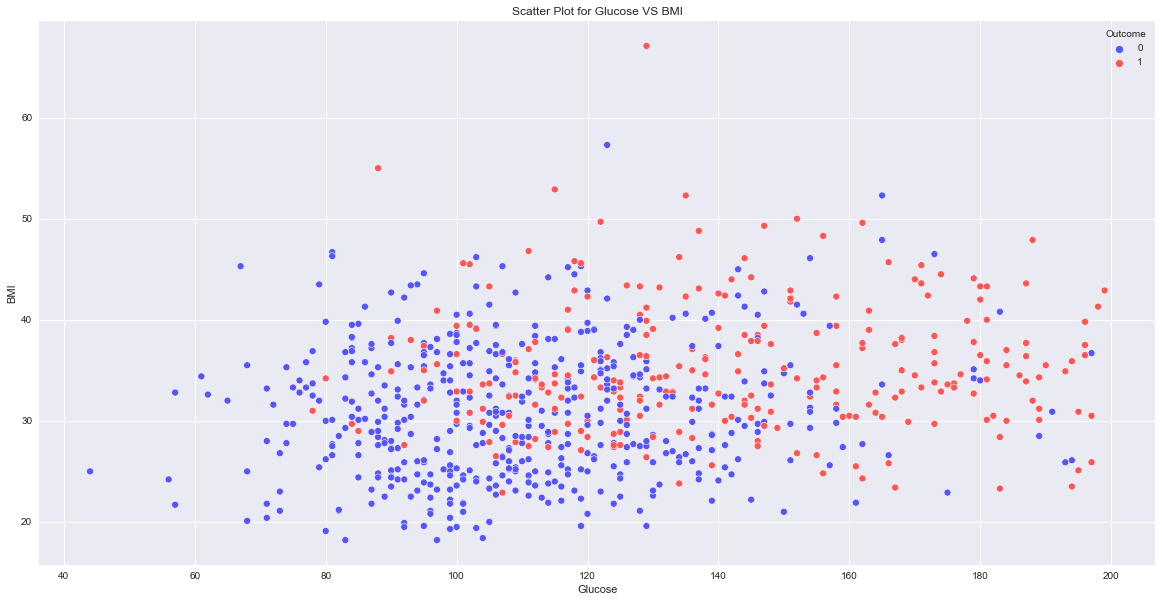

In [5]:
fig, ax = plt.subplots(figsize = (20, 10)) #фигура + координатная плоскость
#Строим диаграмму рассеяния
sns.scatterplot(
    data=diabetes_data, #датасет
    x='Glucose', #ось абсцисс
    y='BMI', #ось ординат
    hue='Outcome', #группировка
    palette='seismic', #палитра
    ax=ax, #координатная плоскость
);
#Задаём название графика
ax.set_title('Scatter Plot for Glucose VS BMI');

In [6]:
# Создадим матрицу наблюдений X из признаков Glucose и BMI и столбец с правильными ответами y из признака Outcome:

#Создаём матрицу наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

Будем решать задачу классификации пациентов с помощью дерева решений.

Модель дерева решений, его модификаций, а также функции для работы с деревьями находятся в модуле tree библиотеки sklearn. Импортируем его:

In [7]:
from sklearn import tree #модели деревьев решения

Модель дерева решений для решения задачи классификации реализована в классе **DecisionTreeClassifier**. Данный класс реализует обучение по алгоритму ***CART***.

Основные параметры DecisionTreeClassifier

* **criterion** — критерий информативности ('gini' — критерий Джини и 'entropy' — энтропия Шеннона).
* **max_depth** — максимальная глубина дерева (по умолчанию — None, глубина дерева не ограничена).
* **max_features** — максимальное число признаков, по которым ищется лучшее разбиение в дереве (по умолчанию — None, то есть обучение производится на всех признаках). Нужно потому, что при большом количестве признаков будет «дорого» искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков.
* **min_samples_leaf** — минимальное число объектов в листе (по умолчанию — 1). У этого параметра есть понятная интерпретация: если он равен 5, то дерево будет порождать только те решающие правила, которые верны как минимум для пяти объектов.
* **random_state** — число, отвечающее за генерацию случайных чисел.

Давайте обучим дерево решений с критерием информативности criterion='entropy' (энтропия Шеннона), максимальной глубиной max_depth=3 и параметром random_state=42.

За обучение, как всегда, отвечает метод **fit()**. Данный метод реализует построение дерева решений по алгоритму CART, который мы рассматривали выше (алгоритм немного оптимизирован разработчиками sklearn, но смысл ровно тот же).

In [8]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_2d = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности 
    max_depth=3, #максимальная глубина
    random_state=42 #генератор случайных чисел
)
#Обучаем дерево решений по алгоритму CART
dt_clf_2d.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

Итак, мы обучили дерево решений. Обученное дерево можно визуализировать в виде графа, чтобы посмотреть, как дерево делает предсказание. Для этого есть функция **plot_tree()** из модуля tree.

Основные параметры функции:

* **decision_tree** — объект обученного дерева решений,
* **feature_names** — наименования факторов,
* **class_names** — названия классов,
* **filled** — добавлять ли расцветку вершин графа.  
Вызовем эту функцию:

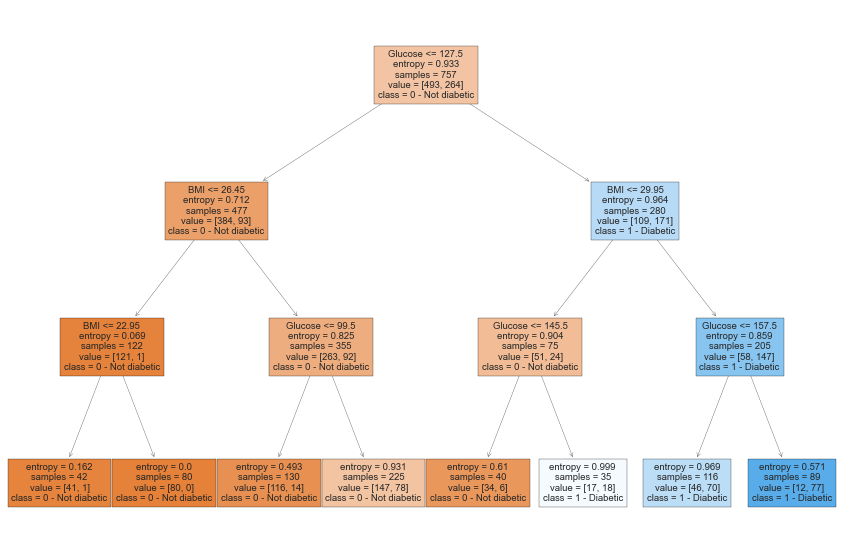

In [9]:
#Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))
#Строим граф дерева решений
tree.plot_tree(
    dt_clf_2d, #объект обученного дерева
    feature_names=X.columns, #наименования факторов
    class_names=["0 - Not diabetic", "1 - Diabetic"], #имена классов
    filled=True, #расцветка графа
);

**В каждой из вершин записана следующая информация:**

* предикат, по которому происходит разбиение;
* entropy — значение энтропии в текущей выборке;
* samples — количество объектов;
* values — количество объектов каждого из классов;
* class — преобладающий класс, на основе которого будет сделано предсказание.

**Как такое дерево будет делать предсказание?**

Например, появился новый пациент с концентрацией глюкозы 180 мг/100 мл и индексом массы тела 51 кг/м2. Мы хотим вычислить вероятность наличия/отсутствия диабета у такого пациента.

«Прогоняем» характеристики пациента через предикаты в вершинах графа. Если предикат равен True, то идём по левому ребру вглубь графа, а если False — по правому.

[Glucose <= 127.5] = False. Переходим в правую вершину.

[BMI <= 29.49] = False. Переходим в правую вершину.

[Glucose <= 157.5] = False. Переходим в правую вершину.

Мы добрались до листовой вершины, которая соответствует объектам класса 1 — Diabetic. Значит, дерево определит данного пациента как больного диабетом.

Вероятность наличия диабета в данном листе равна 77 / (12 + 77) = 0.865.

Вероятность отсутствия диабета: 12 / (12 + 77) = 0.135.

Описанные выше операции дерево производит автоматически с помощью функций **predict()** — для предсказания класса объекта.

In [10]:
#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание класса:
y_new_predict = dt_clf_2d.predict(x_new)
print('Predicted class: {}'.format(y_new_predict))

Predicted class: [1]


c:\Program Files\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [11]:
# И predict_proba() — для предсказания вероятности принадлежности к каждому из классов:

#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание вероятностей:
y_new_proba_predict = dt_clf_2d.predict_proba(x_new)
print('Predicted probabilities: {}'.format(np.round(y_new_proba_predict, 3)))

Predicted probabilities: [[0.135 0.865]]


c:\Program Files\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Давайте посмотрим, как будет выглядеть разделяющая поверхность дерева решений для двух признаков. Для этого воспользуемся функцией plot_probabilities_2d(), которую мы вам представляли в прошлом юните (в 2 юните):

In [15]:
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от 40 до 200, BMI — от 10 до 80
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(40, 200, 0.1),
        np.arange(10, 80, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (20, 10))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(data=X, x='Glucose', y='BMI', hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

c:\Program Files\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Роман\AppData\Local\Temp\ipykernel_6456\1749780326.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar = fig.colorbar(contour)


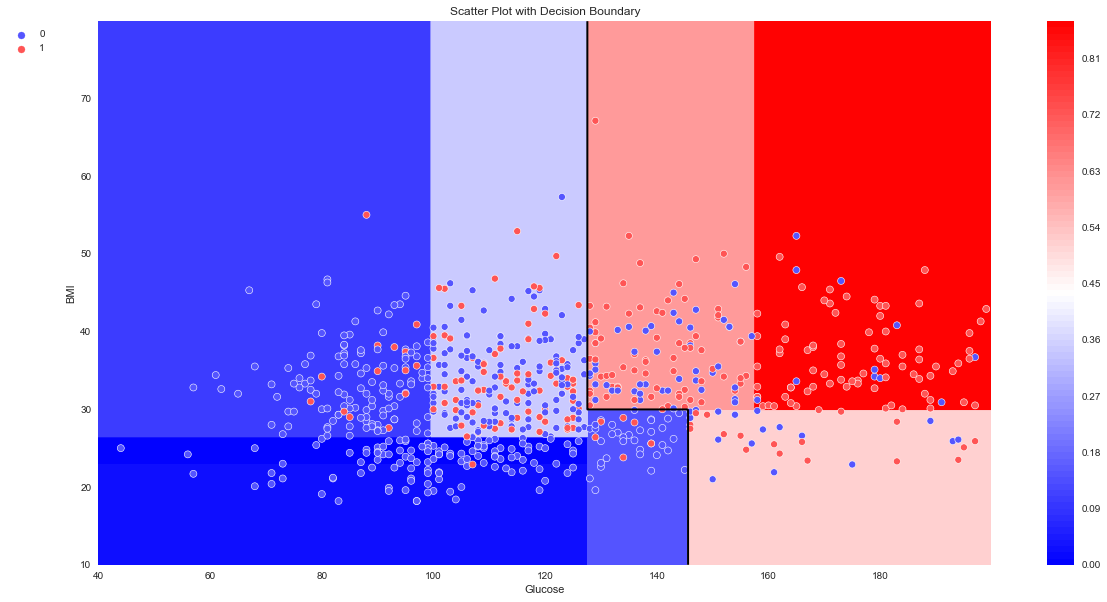

In [16]:
# Вызовем нашу функцию для визуализации:

plot_probabilities_2d(X, y, dt_clf_2d)

Как и ожидалось, дерево решений разделило пространство на множество прямоугольных частей, каждая из которых соответствует определённому листу дерева.

Количество этих областей равно количеству листьев — 8.

*Примечание. Так как вероятности в двух областях практически совпадают, на тепловой карте разница незаметна, области сливаются в одну и вы видите семь областей.*

Попробуйте самостоятельно сопоставить построенное пространство с графом дерева решений, который мы построили выше.

Каждая часть пространства также соответствует определённой вероятности наличия диабета. Отследить её можно с помощью цветовой панели.

Чёрным обозначена граница, где вероятность наличия диабета равна 0.5. Точки, находящиеся правее этой разделяющей границы, относятся деревом к классу 1, а левее, — к классу 0.

Теперь вернитесь в юнит по логистической регрессии и сравните то, как дерево решений и логистическая регрессия делят пространство факторов на части.
***
Можно рассчитать полученные метрики качества. Для этого предскажем наличие диабета для всех пациентов из матрицы наблюдений X, а затем рассчитаем метрики классификации с помощью функции **classification_report()** из библиотеки sklearn:

In [17]:
#Делаем предсказание класса для всего набора данных
y_pred = dt_clf_2d.predict(X)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       493
           1       0.69      0.62      0.65       264

    accuracy                           0.77       757
   macro avg       0.75      0.74      0.74       757
weighted avg       0.77      0.77      0.77       757



Если сравните данный отчёт с полученным ранее для логистической регрессии, обученной на двух признаках, вы увидите, что даже с небольшой глубиной 3 дерево решений решает задачу классификации лучше, чем логистическая регрессия.

Давайте построим дерево решений без ограничения его максимальной глубины. Для этого нам просто не нужно задавать параметр max_depth:

In [18]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_bad = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=42 #генератор случайных чисел
)
#Обучаем дерево решений по алгоритму CART без ограничения его длины
dt_clf_bad.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [19]:
#Делаем предсказание класса для всего набора данных
y_pred = dt_clf_bad.predict(X)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       493
           1       1.00      0.97      0.98       264

    accuracy                           0.99       757
   macro avg       0.99      0.98      0.99       757
weighted avg       0.99      0.99      0.99       757



Потрясающе! Как выросли метрики! Мы практически идеально решаем задачу предсказания наличия диабета. Задача, над которой бьются медики всего мира, решается простейшим алгоритмом машинного обучения с потрясающей точностью! Причём для диагностики нам достаточно всего двух признаков — уровня глюкозы и индекса массы тела.

Не кажется ли вам, что здесь что-то не так?

Давайте визуализируем граф (осторожно, код может выполняться в течение нескольких десятков секунд):

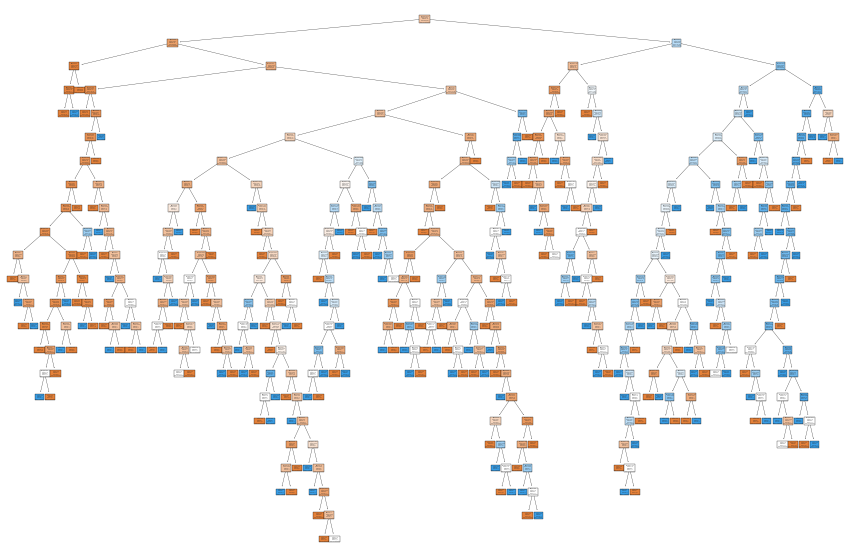

In [20]:
#Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))
#Строим граф 
tree_graph = tree.plot_tree(
    dt_clf_bad, #объект обученного дерева
    feature_names=X.columns, #наименования факторов
    class_names=["0 - Not diabetic", "1 - Diabetic"], #имена классов
    filled=True, #расцветка графа
);

Абсолютный хаос. Дерево задаёт огромное количество вопросов для того, чтобы предсказать правильный диагноз для каждого пациента из набора данных. Дерево настолько глубокое, что даже не помещается на экране.

Примечание. Посмотреть получившуюся глубину дерева можно с помощью метода **get_depth()**:

In [21]:
dt_clf_bad.get_depth()

22

c:\Program Files\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Роман\AppData\Local\Temp\ipykernel_6456\1749780326.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar = fig.colorbar(contour)


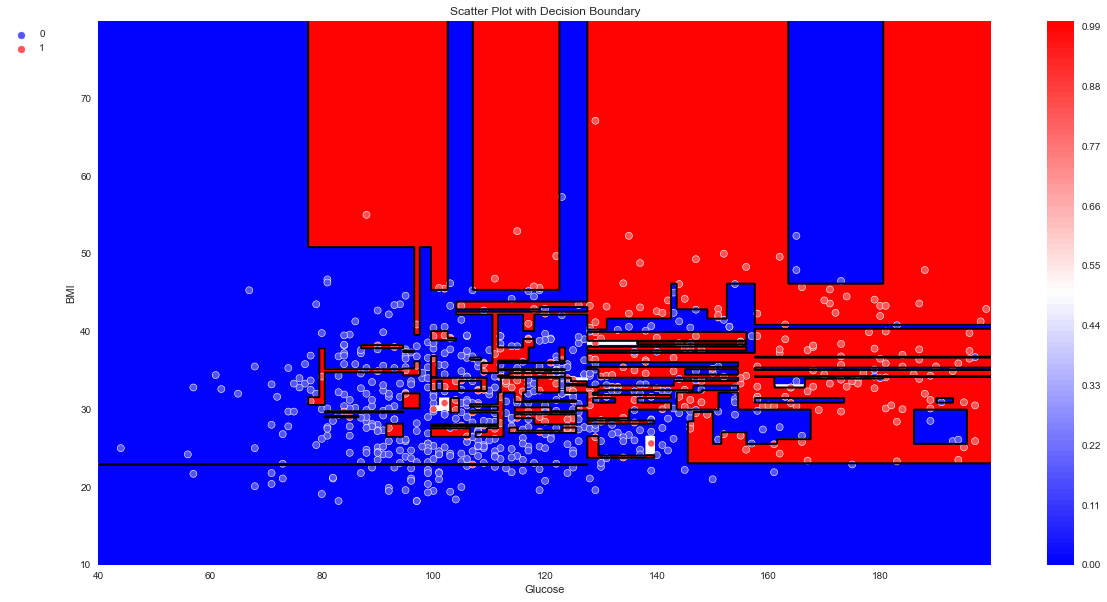

In [22]:
# А теперь давайте посмотрим на разделяющую поверхность:
plot_probabilities_2d(X, y, dt_clf_bad)

Перед нами типичная картина переобучения дерева решений. Дерево решений разделило пространство на огромное количество отдельных частей, чтобы обозначить все точки из обучающего набора данных правильным классом (уменьшить энтропию до нуля).

Конечно же, такая модель не имеет никакой обобщающей способности и никому не нужна.

**Важно!**

**Всегда используйте регуляризацию деревьев — ограничивайте их максимальную глубину (max_depth) и минимальное число объектов в листе (min_samples_leaf).**

К тому же всегда стоит иметь под рукой не только обучающий, но и тестовый набор данных, чтобы оценить переобучение. Об этом мы поговорим в финальном практическом юните.

In [23]:
# Давайте попробуем обучить дерево решений на всех признаках.
# Принцип остаётся тем же, меняется только матрица наблюдений X:

#Создаём матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

Будем использовать дерево решений с максимальной глубиной 6 (мы подобрали её заранее, при такой максимальной глубине наблюдается наименьшее переобучение).

Обучим модель на всех признаках с помощью метода **fit()**, затем сделаем предсказание с помощью метода **predict()** и выведем отчёт о метриках классификации с помощью функции **classification_report()**:

In [24]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_full = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=6, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
#Обучаем модель по алгоритму CART
dt_clf_full.fit(X, y)
 
#Делаем предсказание класса
y_pred = dt_clf_full.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       493
           1       0.84      0.69      0.76       264

    accuracy                           0.85       757
   macro avg       0.84      0.81      0.82       757
weighted avg       0.84      0.85      0.84       757



***
Напоследок расскажем о ещё одной полезной особенности дерева решений. Она заключается в том, что дерево решений позволяет определить важность признаков.

Важность признаков можно посмотреть, обратившись к атрибуту** feature_importances_**:

In [25]:
print(dt_clf_full.feature_importances_)

[0.02675774 0.36675873 0.03368236 0.04553664 0.24588118 0.14137465
 0.14000868]


Значения, которые будут выведены в качестве элементов массива, и есть коэффициенты важности каждого из признаков. Для удобства обычно строят столбчатую диаграмму:

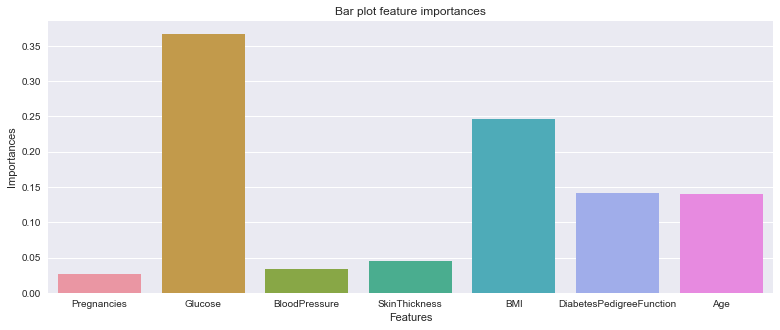

In [26]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
feature = X.columns #признаки
feature_importances = dt_clf_full.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax);
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

Часто «древесные» модели используются в качестве методов для отбора наиболее важных признаков. Это важно, когда в вашем наборе данных большое количество признаков, из-за которых обучение более сложных моделей может стать очень длительным. 

Кроме того, значимость признаков можно использовать в рамках анализа бизнес-процессов. Значимость позволяет понять, на какие признаки стоит обратить наибольшее внимание, чтобы повысить, например, точность их измерения.

***Примечание. Не стоит приравнивать значимость к корреляции. Корреляция — это коэффициент линейной зависимости, а значимость может отражать и нелинейные связи (в зависимости от сложности дерева).***

***
Обучите дерево решений с максимальной глубиной 6 и критерием информативности Джини. В качестве значения параметра random_state возьмите число 42.

Сделайте предсказание и рассчитайте F1-меру.

Чему равно значение метрики? Ответ запишите с точностью до второго знака после точки-разделителя.

In [28]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_full = tree.DecisionTreeClassifier(
    criterion='gini', #критерий информативности
    max_depth=6, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
#Обучаем модель по алгоритму CART
dt_clf_full.fit(X, y)
 
#Делаем предсказание класса
y_pred = dt_clf_full.predict(X)
#Выводим отчёт о метриках
print(metrics.f1_score(y, y_pred))

0.7820773930753563


***
## **ДОСТОИНСТВА И НЕДОСТАТКИ ДЕРЕВЬЕВ РЕШЕНИЙ**

Обобщим всё вышесказанное, выделив основные достоинства и недостатки деревьев решений.

### **ДОСТОИНСТВА**

* Дерево решений **не требует нормализации/стандартизации** данных.
* **Наличие пропусков не оказывает существенного влияния** на построение дерева.
* За счёт своей простоты модель деревьев решений интуитивно понятна и легко объяснима даже людям, не разбирающимся в методе.
* Приятный побочный эффект построения дерева решений — **получение значимости признаков**. Однако коэффициенты значимости целиком и полностью зависят от сложности дерева.

### **НЕДОСТАТКИ**

* В силу дискретной топологической структуры дерево не дифференцируется по параметрам: стандартные алгоритмы поиска параметров, такие как градиентный спуск, не работают. Приходится **использовать полный перебор**.
Примечание. Количество перебираемых вариантов можно сократить, используя методы динамического программирования (их изучение не входит в рамки нашего курса).
* Так как метод является жадным, он **долго обучается из-за полного перебора**. Требует затрат больших вычислительных мощностей (по сравнению с другими алгоритмами). Особенно это ощутимо при большом количестве признаков на глубоких деревьях.
* Очень сильная **склонность к переобучению**. **Необходим подбор внешних параметров**: max_depth, min_sample_leaf и другие (о том, как организовать этот подбор, мы поговорим в отдельном модуле).
* Небольшое изменение в данных может заметно повлиять на структуру дерева.
* При работе с непрерывными числовыми признаками дерево делит их на категории и теряет информацию. Лучше всего дерево работает, если **перевести числовые признаки в категориальные**.